In [1]:
import pandas as pd
import pandas_datareader as dr
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\HIT-2233\Anaconda3\envs\py36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Wikipeda에서 S&P500에 포함된 회사들의 리스트를 가져온다
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500_url)
tickers = data_table[0]['Symbol'].tolist()  #TICKER명만 리스트로 만든다.
security = data_table[0]['Security'].tolist() #Ticker명에 해당하는 회사 전체 이름을 리스트로 가져온다 (이해를 돕기 위한 작업이므로 건너뛰어도 무방하다)
sector = data_table[0]['GICS Sector'].tolist()

tickers = tickers[0:60] #이해를 돕기위해 적은 양의 데이터만 사용하도록 하겠다.
security = security[0:60]
sector = sector[0:60]

prices_list = []

In [3]:
#리스트 길이가 같은지 확인한다. equal 함수를 사용해도 되지만, 데이터가 복잡하지 않기 때문에 가장 간단한 방법을 사용했다.
print(len(tickers))
print(len(security))
print(len(sector)) 

60
60
60


In [4]:
#데이터 불러오기. 2017년1월1일 부터 2020년 2월 28일까지의 데이터를 가져온다.
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)

prices_df.sort_index(inplace=True)

prices_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,ADM,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,160.878021,36.415054,51.917995,112.360001,109.415276,35.706703,103.480003,11.43,168.627762,10.092679,...,41.276485,97.059998,47.991409,87.063789,34.687389,69.122673,76.180000,96.003609,791.460022,157.297501
2017-01-04,161.121964,36.704132,52.650063,115.739998,109.678337,36.408356,104.139999,11.43,170.011581,10.006122,...,41.205002,101.730003,48.597729,87.961052,34.485817,69.512108,77.519997,96.152031,793.039978,157.947693
2017-01-05,160.570786,37.021187,53.049370,114.809998,108.034195,36.973591,105.910004,11.24,169.892990,9.876286,...,40.901161,101.940002,48.707962,87.998062,34.389057,69.169022,76.930000,95.576912,792.000000,158.909500
2017-01-06,161.040649,38.028313,53.066010,115.419998,109.264946,36.944351,108.300003,11.32,167.668976,10.231172,...,39.962864,101.279999,48.818207,88.784348,33.703892,68.770332,79.300003,95.641861,792.909973,160.307739
2017-01-09,160.173203,37.991024,53.415398,117.110001,108.043587,36.739704,108.570000,11.49,167.570175,9.980153,...,39.989666,99.519997,48.138390,87.054535,33.279732,67.880234,79.589996,95.048210,790.340027,157.831848


## 수익률 변화의 정도를 계산하고, 전치를 사용해 ticker명을 Index로 사용한다.

In [5]:
df = prices_df.pct_change().iloc[1:].T

In [6]:
df.head()

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2020-07-01,2020-07-02,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-13,2020-07-14,2020-07-15
MMM,0.001516,-0.003421,0.002926,-0.005387,-0.003892,0.007419,-0.002530,-0.000282,-0.000733,0.006939,...,-0.003590,0.010358,0.006750,-0.020746,-0.001550,-0.020248,0.009244,0.012758,0.024160,0.013214
ABT,0.007938,0.008638,0.027204,-0.000981,0.013500,0.001340,-0.008763,0.005157,-0.000733,-0.003423,...,0.002297,0.006438,0.008023,-0.005486,0.001298,0.011774,-0.006726,0.000537,0.022539,0.015292
ABBV,0.014100,0.007584,0.000314,0.006584,-0.002180,-0.036103,0.002290,0.011586,-0.002097,-0.003233,...,0.009778,-0.002623,0.001315,0.003434,-0.000705,-0.013497,-0.011334,0.010637,0.022652,0.008294
ABMD,0.030082,-0.008035,0.005313,0.014642,-0.041585,-0.008642,0.009886,0.029367,-0.014265,-0.006578,...,0.056549,0.033775,0.008983,-0.006085,0.003968,0.000150,-0.004404,0.000151,-0.000529,0.031069
ACN,0.002404,-0.014991,0.011392,-0.011178,0.000522,0.009213,-0.002928,0.010105,-0.007866,-0.000690,...,-0.000605,0.005266,0.008483,-0.005608,0.011834,0.001919,0.004332,-0.020521,0.015852,0.008426


In [7]:
len(df)

60

In [8]:
test1 = df.index.to_list()

In [9]:
test1 == tickers

True

In [10]:
test2 = []
for i in tickers:
    if i not in test1:
        test2.append(i)
print(test2)

[]


In [13]:
# 만약에 test2에 종목이 나오면 해당 종목을 제거한다.
# tickers.remove('BRK.B')
# tickers.remove('BF.B')
# security.remove('Berkshire Hathaway')
# security.remove('Brown-Forman Corp.')

In [14]:
len(tickers)

60

In [15]:
len(security)

60

In [16]:
#회사명 리스트와 값의 리스트를 저장한다.
companies = list(df.index)
companies
movements = df.values
movements

array([[ 0.00151632, -0.00342087,  0.00292621, ...,  0.01275759,
         0.02416014,  0.01321434],
       [ 0.00793841,  0.00863812,  0.02720404, ...,  0.0005373 ,
         0.0225386 ,  0.0152921 ],
       [ 0.01410045,  0.00758417,  0.00031366, ...,  0.01063718,
         0.02265207,  0.00829372],
       ...,
       [ 0.00154601, -0.00598135,  0.00067955, ..., -0.01148334,
         0.        ,  0.01505363],
       [ 0.00199626, -0.00131138,  0.00114896, ..., -0.00472347,
         0.02259259,  0.01865235],
       [ 0.00413352,  0.0060894 ,  0.00879897, ..., -0.00392828,
         0.0148547 , -0.00796629]])

## 데이터 정규화

In [17]:
normalize = Normalizer()
array_norm = normalize.fit_transform(df)
df_norm = pd.DataFrame(array_norm, columns=df.columns)
final_df = df_norm.set_index(df.index)
final_df.head(10)

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2020-07-01,2020-07-02,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-13,2020-07-14,2020-07-15
MMM,0.003023,-0.006820,0.005834,-0.010739,-0.007760,0.014790,-0.005043,-0.000562,-0.001461,0.013834,...,-0.007157,0.020651,0.013457,-0.041361,-0.003091,-0.040369,0.018430,0.025434,0.048167,0.026345
ABT,0.016428,0.017876,0.056298,-0.002029,0.027938,0.002774,-0.018135,0.010673,-0.001517,-0.007084,...,0.004753,0.013324,0.016604,-0.011352,0.002686,0.024365,-0.013919,0.001112,0.046643,0.031646
ABBV,0.024847,0.013364,0.000553,0.011602,-0.003842,-0.063618,0.004035,0.020417,-0.003696,-0.005697,...,0.017230,-0.004621,0.002317,0.006051,-0.001242,-0.023784,-0.019971,0.018744,0.039916,0.014615
ABMD,0.036371,-0.009715,0.006424,0.017703,-0.050279,-0.010449,0.011953,0.035507,-0.017247,-0.007953,...,0.068372,0.040836,0.010861,-0.007358,0.004798,0.000182,-0.005324,0.000183,-0.000640,0.037565
ACN,0.004859,-0.030294,0.023023,-0.022590,0.001054,0.018618,-0.005917,0.020422,-0.015897,-0.001394,...,-0.001224,0.010642,0.017144,-0.011333,0.023915,0.003878,0.008754,-0.041471,0.032036,0.017029
ATVI,0.028610,0.022604,-0.001151,-0.008065,0.026261,0.031107,-0.002600,-0.006698,0.000000,0.004859,...,0.040859,-0.009703,0.021790,-0.003146,0.014467,0.024976,0.011375,-0.059478,0.033994,-0.029386
ADBE,0.010100,0.026916,0.035736,0.003948,-0.004522,0.010678,-0.005812,-0.000875,-0.007733,0.011584,...,0.016370,0.011306,0.034464,-0.011302,0.029321,0.010934,0.018419,-0.080607,-0.031102,-0.013216
AMD,0.000000,-0.014816,0.006344,0.013385,-0.003879,-0.018698,-0.035015,-0.014910,-0.064025,0.005446,...,-0.000508,-0.004068,0.018051,-0.007845,0.008420,0.063890,-0.021481,-0.036526,0.018794,-0.007980
AAP,0.011366,-0.000966,-0.018131,-0.000816,0.003186,0.028611,0.008306,0.002540,-0.014184,0.007846,...,-0.004862,-0.001073,-0.028123,-0.022725,-0.002331,-0.027406,0.007249,0.007005,0.035361,0.036380
AES,-0.012824,-0.019402,0.053729,-0.036686,-0.025937,0.058068,-0.024138,0.018078,0.024241,0.002511,...,-0.008255,0.007264,-0.001033,-0.034101,0.031724,-0.053846,0.047264,0.029156,0.012256,0.014183


In [18]:
#누락된 데이터가 없는지 확인한다.
col_mask = df.isnull().any(axis=0)
row_mask = df.isnull().any(axis=1)
df.loc[row_mask, col_mask]

Date


In [19]:
df

Date,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,2017-01-18,...,2020-07-01,2020-07-02,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-13,2020-07-14,2020-07-15
MMM,0.001516,-0.003421,0.002926,-0.005387,-0.003892,0.007419,-0.002530,-0.000282,-0.000733,0.006939,...,-0.003590,0.010358,0.006750,-0.020746,-0.001550,-0.020248,0.009244,0.012758,0.024160,0.013214
ABT,0.007938,0.008638,0.027204,-0.000981,0.013500,0.001340,-0.008763,0.005157,-0.000733,-0.003423,...,0.002297,0.006438,0.008023,-0.005486,0.001298,0.011774,-0.006726,0.000537,0.022539,0.015292
ABBV,0.014100,0.007584,0.000314,0.006584,-0.002180,-0.036103,0.002290,0.011586,-0.002097,-0.003233,...,0.009778,-0.002623,0.001315,0.003434,-0.000705,-0.013497,-0.011334,0.010637,0.022652,0.008294
ABMD,0.030082,-0.008035,0.005313,0.014642,-0.041585,-0.008642,0.009886,0.029367,-0.014265,-0.006578,...,0.056549,0.033775,0.008983,-0.006085,0.003968,0.000150,-0.004404,0.000151,-0.000529,0.031069
ACN,0.002404,-0.014991,0.011392,-0.011178,0.000522,0.009213,-0.002928,0.010105,-0.007866,-0.000690,...,-0.000605,0.005266,0.008483,-0.005608,0.011834,0.001919,0.004332,-0.020521,0.015852,0.008426
ATVI,0.019650,0.015525,-0.000791,-0.005539,0.018037,0.021365,-0.001786,-0.004600,0.000000,0.003338,...,0.028063,-0.006664,0.014966,-0.002161,0.009936,0.017154,0.007812,-0.040851,0.023348,-0.020183
ADBE,0.006378,0.016996,0.022566,0.002493,-0.002855,0.006743,-0.003670,-0.000553,-0.004883,0.007315,...,0.010337,0.007139,0.021763,-0.007137,0.018515,0.006904,0.011631,-0.050901,-0.019640,-0.008345
AMD,0.000000,-0.016623,0.007117,0.015018,-0.004352,-0.020979,-0.039286,-0.016729,-0.071834,0.006110,...,-0.000570,-0.004565,0.020252,-0.008802,0.009446,0.071683,-0.024101,-0.040981,0.021086,-0.008953
AAP,0.008206,-0.000698,-0.013091,-0.000589,0.002300,0.020657,0.005997,0.001834,-0.010241,0.005665,...,-0.003510,-0.000775,-0.020304,-0.016408,-0.001683,-0.019787,0.005234,0.005058,0.025531,0.026266
AES,-0.008576,-0.012976,0.035933,-0.024535,-0.017346,0.038835,-0.016143,0.012090,0.016212,0.001679,...,-0.005521,0.004858,-0.000691,-0.022806,0.021216,-0.036011,0.031609,0.019499,0.008197,0.009485


In [20]:
final_df.shape

(60, 888)

In [21]:
# final_df = df.drop(['CTVA', 'DOW'])
# tickers.remove('CTVA')
# tickers.remove('DOW')
# security.remove('Corteva')
# security.remove('Dow Inc.')

In [22]:
len(tickers)

60

## 본격적인 클러스터링

In [23]:
num_of_clusters = range(2,12)
error = []
for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(final_df)
    error.append(clusters.inertia_/100)    
table=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})

table

,Cluster_Numbers,Error_Term
0,2,0.297669
1,3,0.270542
2,4,0.259038
3,5,0.248344
4,6,0.241759
5,7,0.229941
6,8,0.224354
7,9,0.213566
8,10,0.207811
9,11,0.198921


In [24]:
from sklearn import metrics

## 엘보우 방법으로 최적의 클러스터링 갯수를 찾아보자

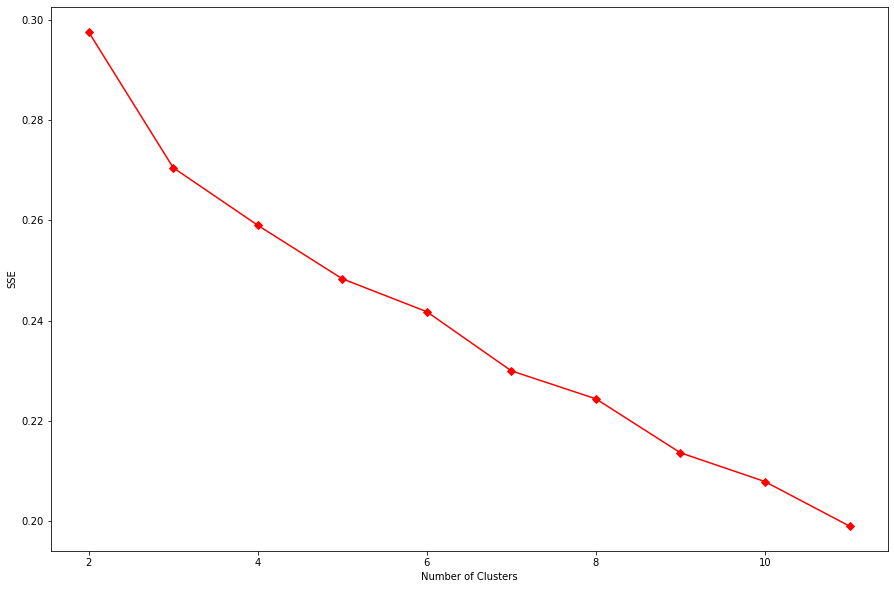

In [25]:
plt.figure(figsize=(15,10))
plt.plot(table.Cluster_Numbers, table.Error_Term, marker = "D", color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

## 7개의 클러스터를 만든다.

In [30]:
clusters = KMeans(7)
clusters.fit(final_df)
clusters.labels_

array([2, 2, 1, 1, 2, 1, 1, 1, 5, 0, 0, 1, 2, 1, 3, 4, 6, 1, 2, 2, 3, 6,
       0, 1, 1, 4, 1, 2, 6, 3, 6, 0, 3, 6, 6, 2, 2, 2, 2, 2, 1, 1, 2, 0,
       1, 3, 6, 1, 1, 3, 4, 1, 0, 0, 4, 6, 1, 2, 5, 6])

In [31]:
labels = clusters.predict(movements)
labels

array([2, 2, 1, 1, 2, 1, 1, 1, 5, 0, 0, 1, 2, 1, 3, 4, 2, 1, 2, 2, 3, 6,
       0, 1, 1, 4, 1, 2, 6, 3, 6, 0, 3, 6, 6, 2, 2, 2, 1, 2, 1, 1, 2, 0,
       1, 3, 6, 1, 1, 3, 4, 1, 0, 0, 4, 6, 1, 2, 5, 6])

In [32]:
print('labels : ',len(labels))
print('companies : ',len(companies))
print('security : ',len(security))
print('sector : ',len(sector))

labels :  60
companies :  60
security :  60
sector :  60


In [33]:
clustered_result = pd.DataFrame({'labels': labels, 'tickers': companies, 'full-name':security, 'sector':sector})
clustered_result.sort_values('labels')

,labels,tickers,full-name,sector
52,0,AJG,Arthur J. Gallagher & Co.,Financials
43,0,AON,Aon plc,Financials
31,0,AXP,American Express Co,Financials
22,0,ALL,Allstate Corp,Financials
10,0,AFL,AFLAC Inc,Financials
53,0,AIZ,Assurant,Financials
9,0,AES,AES Corp,Utilities
40,1,ADI,"Analog Devices, Inc.",Information Technology
51,1,ANET,Arista Networks,Information Technology
23,1,GOOGL,Alphabet Inc. (Class A),Communication Services


In [34]:
final_df['Cluster'] = clusters.labels_
final_df.head()

Date,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,...,2020-07-02 00:00:00,2020-07-06 00:00:00,2020-07-07 00:00:00,2020-07-08 00:00:00,2020-07-09 00:00:00,2020-07-10 00:00:00,2020-07-13 00:00:00,2020-07-14 00:00:00,2020-07-15 00:00:00,Cluster
MMM,0.003023,-0.006820,0.005834,-0.010739,-0.007760,0.014790,-0.005043,-0.000562,-0.001461,0.013834,...,0.020651,0.013457,-0.041361,-0.003091,-0.040369,0.018430,0.025434,0.048167,0.026345,2
ABT,0.016428,0.017876,0.056298,-0.002029,0.027938,0.002774,-0.018135,0.010673,-0.001517,-0.007084,...,0.013324,0.016604,-0.011352,0.002686,0.024365,-0.013919,0.001112,0.046643,0.031646,2
ABBV,0.024847,0.013364,0.000553,0.011602,-0.003842,-0.063618,0.004035,0.020417,-0.003696,-0.005697,...,-0.004621,0.002317,0.006051,-0.001242,-0.023784,-0.019971,0.018744,0.039916,0.014615,1
ABMD,0.036371,-0.009715,0.006424,0.017703,-0.050279,-0.010449,0.011953,0.035507,-0.017247,-0.007953,...,0.040836,0.010861,-0.007358,0.004798,0.000182,-0.005324,0.000183,-0.000640,0.037565,1
ACN,0.004859,-0.030294,0.023023,-0.022590,0.001054,0.018618,-0.005917,0.020422,-0.015897,-0.001394,...,0.010642,0.017144,-0.011333,0.023915,0.003878,0.008754,-0.041471,0.032036,0.017029,2


In [35]:
final_df.tail()

Date,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,2017-01-18 00:00:00,...,2020-07-02 00:00:00,2020-07-06 00:00:00,2020-07-07 00:00:00,2020-07-08 00:00:00,2020-07-09 00:00:00,2020-07-10 00:00:00,2020-07-13 00:00:00,2020-07-14 00:00:00,2020-07-15 00:00:00,Cluster
ATO,0.012276,-0.010754,-0.012559,-0.028201,0.002381,0.023783,0.012353,0.010234,-0.003493,0.014576,...,0.010603,0.001292,-0.025180,-0.015024,-0.037052,0.031225,0.013193,0.016174,0.033411,6
ADSK,0.023700,-0.010255,0.041508,0.004927,0.006602,0.014993,-0.003665,0.011193,-0.044735,0.018680,...,-0.005977,0.023620,-0.029885,0.027969,0.023754,-0.021497,-0.068295,0.015922,-0.008730,1
ADP,0.002869,-0.011100,0.001261,-0.011518,-0.004890,0.018158,0.010789,-0.000536,-0.012518,-0.002881,...,0.017797,0.002342,-0.045922,0.013886,-0.029697,0.018337,-0.021310,0.000000,0.027935,2
AZO,0.003429,-0.002253,0.001974,-0.005568,0.007260,-0.003636,-0.003752,-0.022737,0.005463,-0.008762,...,0.028097,-0.017328,-0.013291,-0.016135,-0.015704,0.009041,-0.008114,0.038811,0.032042,5
AVB,0.007861,0.011580,0.016733,-0.029371,-0.004292,-0.017746,0.015416,-0.003554,0.000539,0.002805,...,0.010402,-0.005113,-0.056876,-0.017454,-0.020592,0.013795,-0.007470,0.028249,-0.015149,6


## Plot

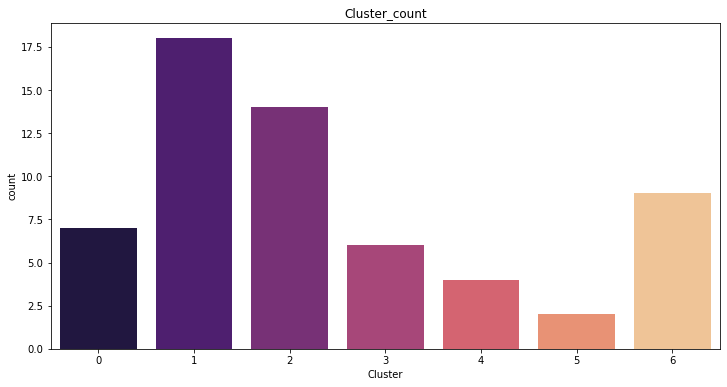

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Cluster', data = final_df, palette = 'magma')
plt.title('Cluster_count')
plt.show()
plt.savefig('cluster_count.png', dpi=300)